In [1]:
import pandas as pd
import numpy as np

In [2]:
path_to_file = './data/house_price_prediction.csv'
df = pd.read_csv(path_to_file)

In [28]:
# Preparing the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['SalePrice']
X = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd']]

SEED = 20

# Use 50% of our data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=SEED)

In [29]:
from sklearn.ensemble import RandomForestRegressor

# define the regressor model by using the RandomForestRegressor class
regressor = RandomForestRegressor(n_estimators = 20, random_state = 20).fit(X_train, y_train)

In [34]:
# Predictions with the Multivariate Regression Model

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2).T})
print(results)

      Actual  Predicted
954   127500  124475.00
326   324000  282350.10
308    82500  115982.50
1058  335000  305783.05
416   149500  144612.50
...      ...        ...
885   328900  321570.40
1080  145000  159875.00
736    93500   90222.50
723   135000  125895.00
481   374000  296220.10

[730 rows x 2 columns]


In [31]:
from sklearn.metrics import r2_score

# How much our model explains of our test data
r2_score(y_test, y_pred)

0.7945595627180451

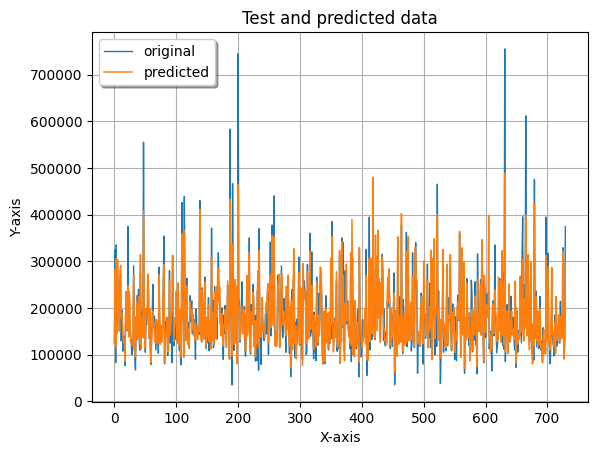

In [32]:
import matplotlib.pyplot as plt

# Visualize the original and predicted data in a plot.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("Test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluating the Multivariate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 23132.78
Mean squared error: 1343400851.26
Root mean squared error: 36652.43
